## k Nearest Neighbors

#### KNN stands for K-Nearest Neighbors. It’s basically a classification algorithm that will make a prediction of a class of a target variable based on a defined number of nearest neighbors.

## 1. IRIS Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
headernames = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'species']
iris_df = pd.read_csv("iris.csv", header = None, names=headernames)

In [3]:
iris_df.head()

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df['species'] = (iris_df['species'] == 'Iris-setosa').astype(int)*1 + \
(iris_df['species'] == 'Iris-versicolor').astype(int)*2 \
+ (iris_df['species'] == 'Iris-virginica').astype(int)*3
X = iris_df.drop(['species'], axis=1)
y = iris_df['species']

In [5]:
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

#### Features distribution in each iris class using boxplots

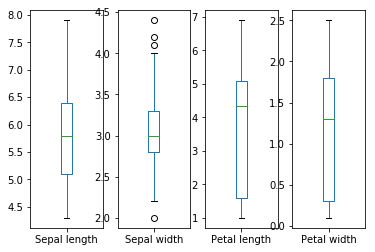

In [7]:
X.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [10]:
class knn(object):
    def __init__(self,k):
        self.k = k
    def train(self, x, y):
        self.X_train = x
        self.y_train = y
    def eu_dis(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        dis = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dis[i,j] = np.sqrt(np.sum((X_test[i]-self.X_train[j])**2))
        return dis
    def pred(self, dis):
        num_test = dis.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            y_indices = np.argsort(dis[i,:])
            closest_y = self.y_train[y_indices[:self.k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

In [11]:
classifier = knn(k=1)
classifier.train(X_train, y_train)
dist = classifier.eu_dis(X_test)
y_test_pred = classifier.pred(dist)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct)/y_test.shape[0]
print(f'Accuracy on test set is: {accuracy*100}%')

Accuracy on test set is: 100.0%


####  k = 1, The decision boundary using the first two features (Sepal length and width)

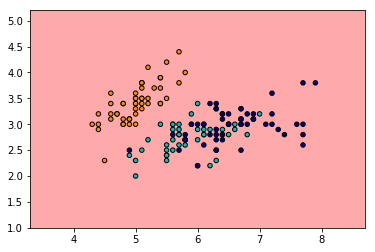

In [12]:
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
h =0.2
X = np.array(X)
y = np.array(y)
clf = knn(k=1)
clf.train(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.pred(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### The prediction using k = 2, 4, 6, 10, 15 and the decision boundaries

In [13]:
k_list = [2,4,6,10,15]
for i in k_list:
    classifier = knn(k=i)
    classifier.train(X_train, y_train)
    dist = classifier.eu_dis(X_test)
    y_test_pred = classifier.pred(dist)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct)/y_test.shape[0]
    print(f'Accuracy on test set is: {accuracy*100}%')

Accuracy on test set is: 96.66666666666667%
Accuracy on test set is: 96.66666666666667%
Accuracy on test set is: 96.66666666666667%
Accuracy on test set is: 96.66666666666667%
Accuracy on test set is: 96.66666666666667%


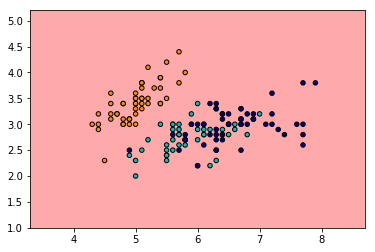

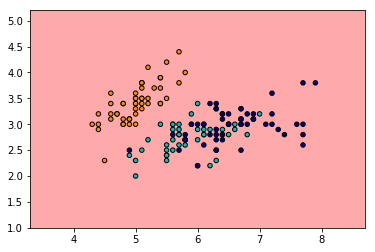

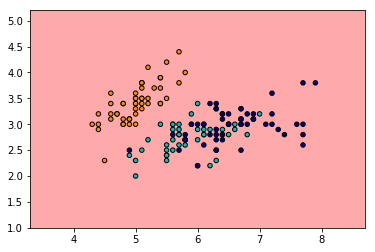

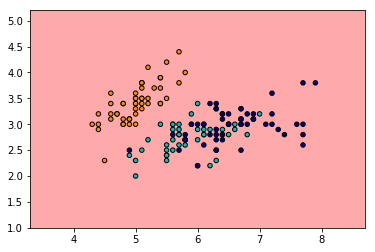

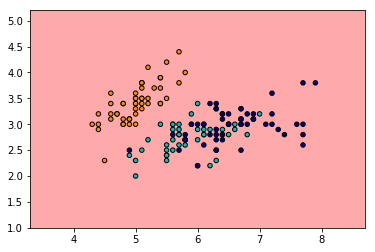

In [14]:
k_list = [2,4,6,10,15]
for i in k_list:
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    X = np.array(X)
    y = np.array(y)
    clf = knn(i)
    clf.train(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.pred(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

#### The complexity of the decision boundary will remain high despite a higher value of k.

#### Distance measure L3

In [15]:
from decimal import Decimal 


class knn(object):
    def __init__(self,k):
        self.k = k
    def train(self, x, y):
        self.X_train = x
        self.y_train = y
    def minkowski_dis(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        dis = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dis[i,j] = np.abs(np.sum(X_test[i]-self.X_train[j])**5)**(1/5)
        return dis
        
    
    def pred(self, dis):
        num_test = dis.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            y_indices = np.argsort(dis[i,:])
            closest_y = self.y_train[y_indices[:self.k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

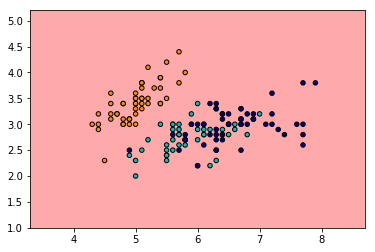

Accuracy on test set is: 83.33333333333334%


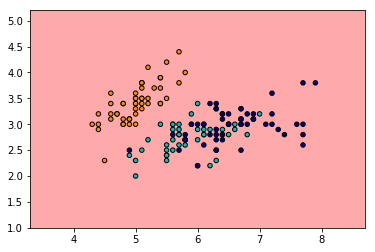

Accuracy on test set is: 83.33333333333334%


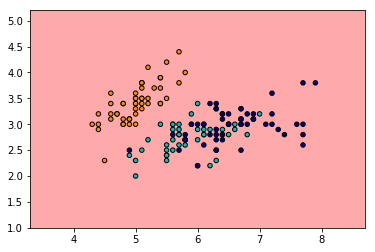

Accuracy on test set is: 90.0%


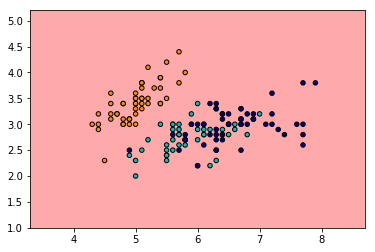

Accuracy on test set is: 93.33333333333333%


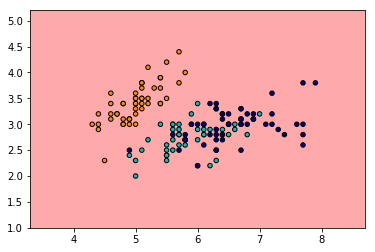

Accuracy on test set is: 83.33333333333334%


In [16]:
p_value = 3
k_list = [2,4,6,10,15]
for i in k_list:
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    X = np.array(X)
    y = np.array(y)
    clf = knn(i)
    clf.train(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = clf.pred(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()
    
    classifier = knn(k=i)
    classifier.train(X_train, y_train)
    dist = classifier.minkowski_dis(X_test)
    y_test_pred = classifier.pred(dist)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct)/y_test.shape[0]
    print(f'Accuracy on test set is: {accuracy*100}%')

#### Accuracy drops with the Minkowski distance as compared to Euclidean distance.

## 2. MNIST dataset

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [18]:
train = pd.read_csv("mnist_train.csv", header = None)
n = [500, 1000, 2500, 5000, 10000, 30000, 60000]
train_500 = train.sample(500)
train_1000 = train.sample(1000)
train_2500 = train.sample(2500)
train_5000 = train.sample(5000)
train_10000 = train.sample(10000)
train_30000 = train.sample(30000)

In [19]:
test = pd.read_csv("mnist_test.csv", header = None)
test = test.sample(n=1000)
X_test = test.drop([0], axis=1)
y_test = test[0]

In [20]:
X_train = train_500.drop([0], axis=1)
y_train = train_500[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 500)

err_rate: 0.18300000000000005  for training size : 500


In [21]:
X_train = train_1000.drop([0], axis=1)
y_train = train_1000[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 1000)

err_rate: 0.13  for training size : 1000


In [22]:
X_train = train_2500.drop([0], axis=1)
y_train = train_2500[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 2500)

err_rate: 0.09499999999999997  for training size : 2500


In [23]:
X_train = train_5000.drop([0], axis=1)
y_train = train_5000[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 5000)

err_rate: 0.07299999999999995  for training size : 5000


In [24]:
X_train = train_10000.drop([0], axis=1)
y_train = train_10000[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 10000)

err_rate: 0.05700000000000005  for training size : 10000


In [25]:
X_train = train_30000.drop([0], axis=1)
y_train = train_30000[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 30000)

err_rate: 0.04600000000000004  for training size : 30000


In [26]:
X_train = train.drop([0], axis=1)
y_train = train[0]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 60000)

err_rate: 0.04300000000000004  for training size : 60000


#### The classification error change with number of training example

Text(0, 0.5, 'Classification error rate')

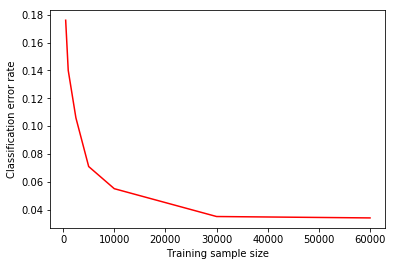

In [27]:
plt.plot([500, 1000, 2500, 5000, 10000, 30000, 60000], [0.176, 0.14, 0.1059, 0.0709, 0.055, 0.035, 0.034], 'r')
plt.xlabel('Training sample size')
plt.ylabel('Classification error rate')

#### Confusion matrix of the best test

In [28]:
confusion_matrix(y_test, y_pred)

array([[116,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 110,   1,   0,   0,   0,   0,   0,   0,   0],
       [  2,   1,  96,   1,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0, 104,   0,   2,   0,   2,   0,   0],
       [  2,   1,   0,   0,  91,   0,   0,   1,   0,   0],
       [  1,   0,   0,   2,   0,  81,   0,   0,   0,   1],
       [  2,   0,   0,   0,   0,   0,  90,   0,   0,   0],
       [  0,   4,   1,   0,   0,   0,   0,  99,   0,   1],
       [  1,   0,   1,   3,   0,   1,   0,   0,  84,   0],
       [  0,   0,   0,   2,   1,   0,   1,   6,   0,  86]])

#### Distance based voting for training examples = 30000

In [30]:
train_30000 = train.sample(30000)
X_train = train_30000.drop([0], axis=1)
y_train = train_30000[0]
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
err_rate = 1 - metrics.accuracy_score(y_test, y_pred)
print("err_rate:",err_rate, " for training size :", 30000)

err_rate: 0.04200000000000004  for training size : 30000


#### The error rate is slightly less compared to the error rate of uniform weights